## imports

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## file clean up

In [2]:
#get file into presentable format
df = pd.read_csv('arrhythmia.data', header=None, dtype=str)
channels = ['DI', 'DII', 'DIII', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
measurements1 = ['Q wave', 'R wave', 'S wave', "R' wave", "S' wave", 'Num intrinsic deflections', 'Existence of ragged R wave', 'Existence of diphasic derivation of R wave', 'Existence of ragged P wave', 'Existence of diphasic derivation of P wave', 'Existence of ragged T wave', 'Existence of diphasic derivation of T wave']
measurements2 = ['JJ', 'Q', 'R', 'S', "R'", "S'", 'P', 'T', 'QRSA', 'QRSTA']
cols = ['Age', 'Sex', 'Height', 'Weight', 'QRS duration', 'PR interval', 'QT interval', 'T interval', 'P interval', 'QRS', 'T', 'P', 'QRST', 'J', 'Heart Rate']

for channel in channels:
    for measurement in measurements1:
        cols.append(f'{channel}: {measurement}')

for channel in channels:
    for measurement in measurements2:
        cols.append(f'{channel}: {measurement}')

cols.append('Classification')

df.columns=cols
classifications = df['Classification'].astype(int).to_list()
df.drop(columns=['Classification'], inplace=True)

for x in range(len(classifications)):
    if classifications[x] == 1:
        classifications[x] = 'normal'
    elif classifications[x] >= 2 or classifications[x] <= 15:
        classifications[x] = 'arrhythmia'
    else:
        classifications[x] = 'unclassified'

  Age Sex Height Weight QRS duration PR interval QT interval T interval  \
0  75   0    190     80           91         193         371        174   
1  56   1    165     64           81         174         401        149   
2  54   0    172     95          138         163         386        185   
3  55   0    175     94          100         202         380        179   
4  75   0    190     80           88         181         360        177   

  P interval  QRS  ... V6: JJ V6: Q V6: R V6: S V6: R' V6: S' V6: P V6: T  \
0        121  -16  ...   -0.3   0.0   9.0  -0.9    0.0    0.0   0.9   2.9   
1         39   25  ...   -0.5   0.0   8.5   0.0    0.0    0.0   0.2   2.1   
2        102   96  ...    0.9   0.0   9.5  -2.4    0.0    0.0   0.3   3.4   
3        143   28  ...    0.1   0.0  12.2  -2.2    0.0    0.0   0.4   2.6   
4        103  -16  ...   -0.4   0.0  13.1  -3.6    0.0    0.0  -0.1   3.9   

  V6: QRSA V6: QRSTA  
0     23.3      49.4  
1     20.4      38.8  
2     12.3      4

In [3]:
mask = df.apply(lambda col: col.str.contains('\?').any(), axis=0)
tmp = df.loc[: , mask]

tmp.replace('?', np.nan, inplace=True)
#tmp = tmp.astype(str)

tmp.columns

for index, row in tmp.iterrows():
    if row['T'] == 'nan':
        print('T:', row['T'])

C:\Users\Hauck\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [4]:
df.replace('?', np.nan, inplace=True)
df = df.astype(float)

In [5]:
df = df.astype(float)

t_mean = df['T'].mean()
df['T'].fillna(value=str(t_mean), inplace=True)

p_mean = df['P'].mean()
df['P'].fillna(value=p_mean, inplace=True)

qrst_mean = df['QRST'].mean()
df['QRST'].fillna(value=qrst_mean, inplace=True)

j_mean = df['J'].mean()
df['J'].fillna(value=j_mean, inplace=True)

hr_mean = df['Heart Rate'].mean()
df['Heart Rate'].fillna(value=hr_mean, inplace=True)


## PCA: makes it easier to visualize

In [23]:
pca = sklearnPCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(df))

## Elbow Graph

C:\Users\Hauck\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


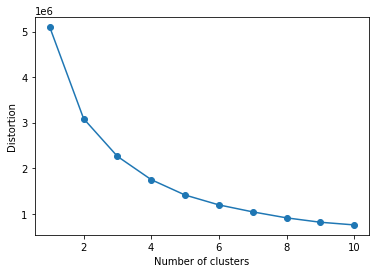

In [24]:
dist = []

for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        init='random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=0
    )
    km.fit(transformed)
    dist.append(km.inertia_)

plt.plot(range(1, 11), dist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# scatter plot 2 clusters

In [25]:
km = KMeans(
    n_clusters=2,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0
)
y_km = km.fit_predict(transformed)

In [26]:
cluster0 = transformed[y_km == 0]
cluster1 = transformed[y_km ==1]

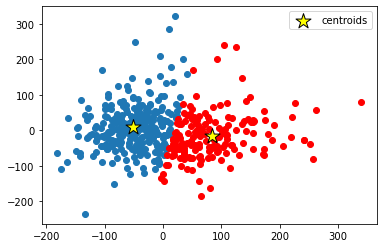

In [27]:
plt.scatter(cluster0[0], cluster0[1], label='')
plt.scatter(cluster1[0], cluster1[1], color='red')
plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=250,
    marker='*',
    c='yellow',
    edgecolor='black',
    label='centroids'
)
plt.legend()
plt.show()